In [0]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# importing training data

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [0]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [0]:
# Creating a data strucutre with 60 timesteps and 1 output
# timesteps -- How many steps you want to go in past and consider to predict
X_train = []
y_train = []

for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
  
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
X_train.shape

(1198, 60, 1)

In [0]:
# Building the RNN

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [0]:
regressor = Sequential()

In [0]:
regressor.add(LSTM(units = 50, return_sequences=True, input_shape= (X_train.shape[1], 1)))
regressor.add(Dropout(0.20))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.20))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.20))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.20))

W0728 00:44:55.460983 140104367900544 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
regressor.add(Dense(units=1))

In [0]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

W0728 00:57:42.056544 140104367900544 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
1198/1198 [==============================] - 11s 9ms/sample - loss: 0.0560
Epoch 2/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0052
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0043
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0039
Epoch 10/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0042
Epoch 12/100
1198/1198 [===========================

In [0]:
model_json = regressor.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)
  
regressor.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
# importing testing data

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test["Open"]), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [0]:
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [0]:
# Creating a data strucutre with 60 timesteps and 1 output
# timesteps -- How many steps you want to go in past and consider to predict
X_test = []

for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
  
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [0]:
predicted_stock_price

array([[803.5944 ],
       [800.49524],
       [800.9174 ],
       [802.7017 ],
       [806.6286 ],
       [813.2794 ],
       [819.137  ],
       [821.18   ],
       [821.0579 ],
       [820.37933],
       [819.9    ],
       [819.5969 ],
       [819.4915 ],
       [820.2067 ],
       [821.35126],
       [826.5714 ],
       [834.2433 ],
       [842.25397],
       [846.20355],
       [840.8255 ]], dtype=float32)

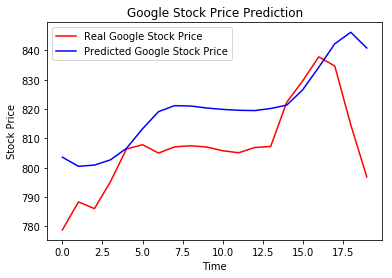

In [0]:
# Visualizing

plt.plot(real_stock_price, color='red', label="Real Google Stock Price")
plt.plot(predicted_stock_price, color='blue', label="Predicted Google Stock Price")
plt.title('Google Stock Price Prediction')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()